# Week 13: Naive Bayes Classifiers

<font size="6"> Laboratory 9 </font> <br>
<font size="3"> Last updated November 11, 2024 </font>

## <span style="color:#d97f00;"> 00. Content </span>

<font size="5"> Mathematics </font>
- Bayes' Theorem
     
<font size="5"> Programming Skills </font>
- Machine Learning
    
<font size="5"> Embedded Systems </font>
- N/A

## <span style="color:#d97f00;"> 0. Required Hardware </span>

- N/A

<h3 style="color:green"> Write your name and email below: </h3>

**Name:** 

**Email:** 

## <span style="color:#d97f00;"> 1. Introduction to Bayes' Theorem </span>

## Mathematical Formulation

Bayes' Theorem is a fundamental concept in probability theory that describes the relationship between conditional probabilities. Mathematically, it is expressed as:

$$
P(A | B) = \frac{P(B | A) \cdot P(A)}{P(B)}
$$

Where:

- $P(A | B)$ is the probability of event $A$ occurring given that event $B$ has occurred.
- $P(B | A)$ is the probability of event $B$ occurring given that event $A$ has occurred.
- $P(A)$ and $P(B)$ are the probabilities of events $A$ and $B$ occurring independently.

Bayes' Theorem allows us to update our beliefs about the probability of an event based on new evidence. It provides a way to reverse conditional probabilities. In other words, if we know $P(B | A)$, we can find $P(A | B)$ by considering the overall likelihoods of $A$ and $B$.

Imagine you're trying to determine how likely it is that someone has a disease ($A$) after they've received a positive test result ($B$). Bayes' Theorem helps you combine the test accuracy with the prevalence of the disease to find the updated probability.



### <span style="color:red"> Exercise 1: The Disease Paradox</span>

Consider a rare disease that affects **1 in 10,000** people. A medical test has the following characteristics:

- **True Positive Rate**: If a person has the disease, the test correctly identifies it **99%** of the time.
- **False Positive Rate**: If a person does not have the disease, the test incorrectly indicates they have it **1%** of the time.

A randomly selected person from the general population takes the test and receives a **positive** result. Apply Bayes' theorem to calculate the probability that this person actually has the disease. 


### <span style="color:red"> Exercise 2: Changing the False Positive Rate</span>

For what value of the false positive rate would the probability of having the disease given a positive test result be equal to 50%? In other words, find the value of $P(T | \overline{D})$ that makes $P(D | T) = 0.5$. __Give your answer as a LaTeX equation, not a python script__


## <span style="color:#d97f00;"> 2. Naive Bayes Classification</span>

## Introduction to Classifiers

In machine learning, a **classifier** is an algorithm that assigns a category or class label to input data based on its features. Classifiers are essential tools for tasks like detecting spam emails, image recognition, and medical diagnosis.

### Features and Labels

- **Features**: The measurable properties or characteristics of the data used for analysis. They are the inputs to the classifier.
- **Class Labels**: The output categories or classes that we aim to predict. They represent the classification outcome.

### Examples of Features and Labels

| **Classifier Type**| **Features**| **Class Labels**|
|-|-|-|
| **Spam Email Classifier**     | Words in the email, email length, presence of links, sender's address                            | "Spam" and "Not Spam"              |
| **Medical Diagnosis Classifier** | Patient age, blood pressure, cholesterol level, presence of specific symptoms                 | "Disease" and "No Disease" (or specific diseases like "Diabetes," "Hypertension") |
| **Image Classifier**          | Pixel values, color histograms, shapes, textures                                                 | "Dog," "Cat," "Bird," etc.         |

## Naive Bayes Classifier

The **Naive Bayes classifier** is a simple yet powerful probabilistic classifier based on Bayes' Theorem. It assumes that the features are independent given the class label—a "naive" assumption that simplifies computation but still often yields effective results.

### How It Works

Given a feature vector $X = (x_1, x_2, ..., x_n)$ and a class $C$, the Naive Bayes classifier computes the posterior probability $P(C | X)$ and assigns $X$ to the class with the highest posterior probability.

The classifier uses Bayes' Theorem:

$$
P(C | X) = \frac{P(X | C) \cdot P(C)}{P(X)}
$$

There are several different types of Naive Bayes classifiers. Each assumes a different distribution for the features.

#### 1. **Gaussian Naive Bayes**
This is used when the probabilities of the features are continuous and are assumed to follow a Gaussian (normal) distribution. For a feature $x_i$ given class $C$, the likelihood is modeled as:
$$
P(x_i \mid C) = \frac{1}{\sqrt{2\pi\sigma_C^2}} \exp\left(-\frac{(x_i - \mu_C)^2}{2\sigma_C^2}\right)
$$
where $ \mu_C $ is the mean and $ \sigma_C^2 $ is the variance of the feature in class $C$.

#### 2. **Multinomial Naive Bayes**
This is suited for discrete data, especially when features represent counts (like word frequencies in text classification). It assumes that the features follow a multinomial distribution. For a feature vector $ \mathbf{x} = (x_1, x_2, ..., x_n) $, the likelihood is given by:
$$
P(\mathbf{x} \mid C) = P(C) \prod_{i=1}^{n} P(x_i \mid C)^{x_i}
$$
Here, $ P(x_i \mid C) $ is the probability of feature $x_i$ given class $C$, and $ x_i $ represents the count of feature $i$.

#### 3. **Bernoulli Naive Bayes**
This is designed for binary feature vectors, where each feature can either be 0 or 1 (presence or absence). The likelihood for Bernoulli Naive Bayes is:
$$
P(\mathbf{x} \mid C) = P(C) \prod_{i=1}^{n} P(x_i \mid C)^{x_i} (1 - P(x_i \mid C))^{(1 - x_i)}
$$
where $x_i$ is 1 if the feature is present and 0 otherwise, and $P(x_i \mid C)$ is the probability of feature $x_i$ being 1 given the class $C$.

#### 4. **Categorical Naive Bayes**
This variant is used when the features are categorical (not ordered). Each feature can take on a finite number of discrete values, and it is modeled using a categorical distribution. For a feature $x_i$ that can take on one of $k$ values:
$$
P(x_i = v_k \mid C) = P(v_k \mid C)
$$
where $P(v_k \mid C)$ is the probability that feature $x_i$ takes the value $v_k$ given class $C$.


| **Naive Bayes Variant**| **Best Use Case**| **Feature Types**| **Example Features** |
|-|-|-|-|
| **Gaussian Naive Bayes**| Features are continuous and assume a normal (Gaussian) distribution | Continuous | Exam scores in a calculus class, height of a population|
| **Multinomial Naive Bayes**    | Features represent counts or frequency of occurrences| Count data, frequency data | Frequencies of words in text classification |
| **Bernoulli Naive Bayes**      | Features are binary indicators (e.g., presence/absence of a feature)| Binary | Presence of a disease in medical diagnosis |
| **Categorical Naive Bayes**    | Features are categorical and do not assume any ordering or continuity | Categorical/discrete | Weather (e.g., sunny, cloudy, rainy) |

### <span style="color:red"> Exercise 3: Gaussian Naive Bayes Illustration</span>

The following code generates and plots two classes of data points with Gaussian distributions. 

1. Fit the classes to Gaussian distributions and plot the data with the Gaussian curves. 

2. Find the value of $x$ so that the probability of a data point belonging to each of the two classes is equal. Plot a vertical line at this value. This point is the __decision boundary__ between the two classes.

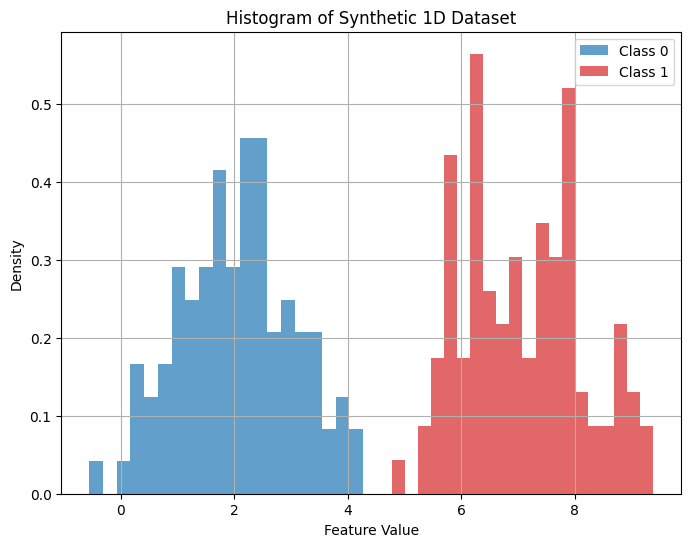

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Parameters for Class 0
mean0 = 2
std0 = 1  # Standard deviation

# Parameters for Class 1
mean1 = 7
std1 = 1  # Standard deviation

# Number of samples per class
n_samples = 100

# Generate data for Class 0
X0 = np.random.normal(mean0, std0, n_samples)
y0 = np.zeros(n_samples)

# Generate data for Class 1
X1 = np.random.normal(mean1, std1, n_samples)
y1 = np.ones(n_samples)

# Combine the data
X = np.concatenate((X0, X1))
y = np.concatenate((y0, y1))


# Plotting
plt.figure(figsize=(8, 6))
plt.hist(X0, bins=20, alpha=0.7, label='Class 0', color='tab:blue', density=True)
plt.hist(X1, bins=20, alpha=0.7, label='Class 1', color='tab:red', density=True)
plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.title('Histogram of Synthetic 1D Dataset')
plt.legend()
plt.grid(True)
plt.show()


## <span style="color:#d97f00;"> 3. A Simple Example </span>

In this example, we'll demonstrate **Categorical Naive Bayes** classification using only one categorical feature: **Weather**. 

## Problem Statement

Suppose we have data about whether children decide to **Play** outside based on the **Weather** conditions. The possible weather conditions are:

- **Sunny**
- **Overcast**
- **Rainy**

Our dataset:

| Day | Weather   | Play |
|-----|-----------|------|
| 1   | Sunny     | No   |
| 2   | Sunny     | No   |
| 3   | Overcast  | Yes  |
| 4   | Rainy     | Yes  |
| 5   | Rainy     | Yes  |
| 6   | Rainy     | No   |
| 7   | Overcast  | Yes  |
| 8   | Sunny     | No   |
| 9   | Sunny     | Yes  |
| 10  | Rainy     | Yes  |
| 11  | Sunny     | Yes  |
| 12  | Overcast  | Yes  |
| 13  | Overcast  | Yes  |
| 14  | Rainy     | No   |

Predict whether children will **Play** or **Not Play** on a **Sunny** day.

### <span style="color:red"> Exercise 4: Calculate the Probabilities</span>

Calculate the prior probabilities of each class (Play = Yes or No):



### <span style="color:red"> Exercise 5: Calculate the Conditional Probabilities</span>

Calculate the likelihood of each weather condition given the class (e.g. $ P(\text{Weather | Play = Yes})$).

### <span style="color:red"> Exercise 6: Calculate the Posterior Probabilities</span>

Predict whether children will **Play** or **Not Play** on a **Sunny** day.



### <span style="color:red"> Exercise 7: The Multivariate Case</span>

Write an expression for the posterior probability $ P(C | X) $ in the multivariate case, where $ X = (x_1, x_2, ..., x_n) $ represents multiple features. Express your answer in terms of $x_i$, assuming that the features are independent given the class label $C$.

## <span style="color:#d97f00;"> 4. Heart disease </span>

The UCI Machine Learning Repository's Heart Disease dataset is a popular benchmark for classification tasks in machine learning. It contains medical data from individuals, with the goal of predicting the presence or absence of heart disease based on several attributes like age, sex, cholesterol levels, blood pressure, and others. This dataset is ideal for demonstrating classification algorithms like Naive Bayes because it includes both continuous and categorical features. To use this dataset in Python, you can install the `ucimlrepo` package, which provides easy access to datasets from the UCI repository. Install the package using the command:

```bash
pip install ucimlrepo
```

After installation, you can load the heart disease dataset as follows:



In [84]:
from ucimlrepo import fetch_ucirepo 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

You can examine the metadata and variables to learn more about the dataset

In [85]:
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

We will simplify the problem by converting the target variable from its original range of 0 to 4 into a binary classification: 0 for no heart disease and 1 for the presence of heart disease. 

Because we will be fitting the data to a gaussian model, we will discard binary features, such as exercise-induced angina (exang), and multinomial features, such as chest pain type (cp). 

In [88]:
y = y.applymap(lambda x: 0 if x == 0 else 1)
X = X[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]

C:\Users\chris\AppData\Local\Temp\ipykernel_16756\3801226080.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y = y.applymap(lambda x: 0 if x == 0 else 1)


### <span style="color:red"> Exercise 8: Building Intuition</span>

Choose two features, and make a contour plot of the likelihood of heart disease as a function of these features in matplotlib. 

_Hint: The easiest way to do this is probably to make a scatter plot where the colors of the points correspond to the likelihood of having heart disease`._ 

### Training a Gaussian Naive Bayes Classifier

In this section, we will train a Gaussian Naive Bayes classifier using scikit-learn to predict the presence and severity of heart disease based on patient data.

In [90]:
import numpy as np

# Assuming age, trestbps, chol, thalach, oldpeak, ca, and y are already defined numpy arrays

# Stack the feature arrays into a single feature matrix
# X = np.column_stack((age, trestbps, chol, thalach, oldpeak, ca))
X = X.to_numpy()

# Check the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (303, 5)
Shape of y: (303, 1)


Here, we have combined all the feature arrays into a two-dimensional feature matrix `X`, where each row represents a patient, and each column represents a feature.

#### Splitting the Data into Training and Testing Sets

We will split the data into training and testing sets to evaluate the performance of our classifier on unseen data.




In [91]:
from sklearn.model_selection import train_test_split

# Split the data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (242, 5)
Testing set shape: (61, 5)


We use `train_test_split` from scikit-learn to randomly split the dataset while preserving the distribution of the target variable.

#### Training the Classifier

Now, we will instantiate the Gaussian Naive Bayes classifier and train it on the training data.




In [92]:
from sklearn.naive_bayes import GaussianNB

# Instantiate the classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

c:\Users\chris\miniconda3\envs\qutip-env\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

#### Evaluating the Classifier

We will evaluate the classifier's performance using a confusion matrix, which provides a summary of prediction results.

The confusion matrix provides the following information:

- **True Positives (TP)**: Correctly predicted positive observations.
- **True Negatives (TN)**: Correctly predicted negative observations.
- **False Positives (FP)**: Incorrectly predicted positive observations.
- **False Negatives (FN)**: Incorrectly predicted negative observations.

By analyzing the confusion matrix, we can understand where the classifier is making mistakes and how it can be improved.

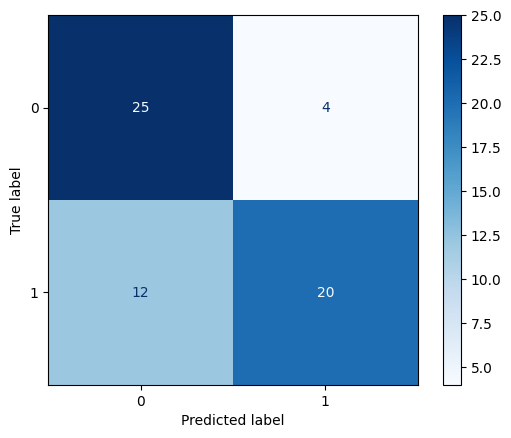

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Display the confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

#### Calculating Accuracy

We can also evaluate the model's __accuracy__. Accuracy measures how often the classifier's predictions are correct, and it's calculated using the following formula:

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
$$

In this case:
- **`y_test`** contains the true labels for the test dataset. These are the correct answers, the ground truth.
- **`y_pred`** contains the predicted labels, which are the guesses made by the classifier for the test data.

The function `accuracy_score(y_test, y_pred)` compares the predicted labels (`y_pred`) with the actual labels (`y_test`) to count how many predictions are correct. It then divides the number of correct predictions by the total number of predictions to calculate the accuracy.

For example, if we had 100 test samples and the classifier predicted 90 of them correctly, the accuracy would be:

$$
\text{Accuracy} = \frac{90}{100} = 0.90
$$

In [94]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the classifier:", accuracy)


Accuracy of the classifier: 0.7377049180327869


### <span style="color:red"> Exercise 9: Evaluating the model </span>

- From the confusion matrix, are the true positives, true negatives, false positives, and false negatives for this model? 

- Which is a more meaningful way to evaluate the model's performance: accuracy or the confusion matrix? Why?

- Is the classifier a good model? Why or why not?

## Visualizing Decision Boundaries

To visualize the decision boundaries, we can plot the classifier's predictions over a grid of feature values. Since we cannot plot in more than two dimensions, we'll select pairs of features.

The following code takes two features from the matrix of features and trains a model using those features alone. It then plots the decision boundaries for the model.

c:\Users\chris\miniconda3\envs\qutip-env\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


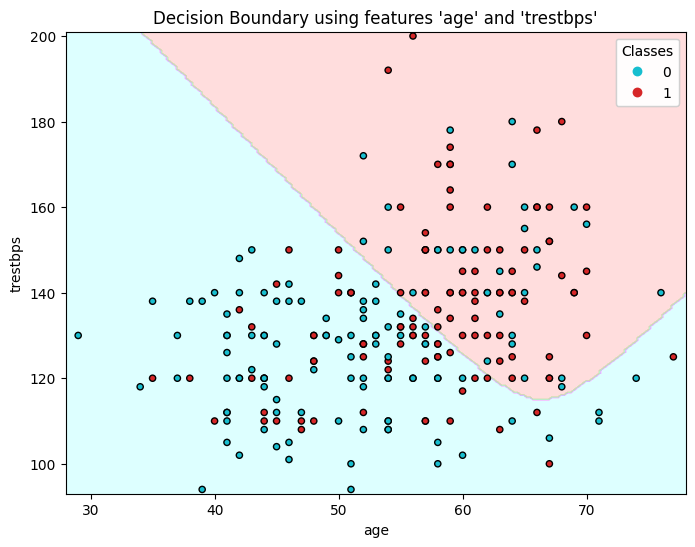

In [97]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Feature names for labeling
feature_names = ['age', 'trestbps']

# Define colormap for 5 classes
cmap_light = ListedColormap(np.flip(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFAAFF', '#AAFFFF']))
cmap_bold = np.flip(['tab:red', 'tab:green', 'tab:blue', 'tab:purple', 'tab:cyan'])

# Select two features to plot
i, j = 0, 1

X_pair = X_train[:, [i, j]]
y_pair = y_train

# Create meshgrid
x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                        np.linspace(y_min, y_max, 200))

# Fit classifier on the pair of features
gnb = GaussianNB()
gnb.fit(X_pair, y_pair)
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_light)

# Plotting the actual data points
scatter = plt.scatter(X_pair[:, 0], X_pair[:, 1], c=y_pair.values, s=20, cmap=ListedColormap(cmap_bold), edgecolor='k')
plt.xlabel(f"{feature_names[i]}")
plt.ylabel(f"{feature_names[j]}")
plt.title(f"Decision Boundary using features '{feature_names[i]}' and '{feature_names[j]}'")

# Custom legend handling
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)


### <span style="color:red"> Exercise 10: Plotting decision boundaries </span>

- Plot the decision boundaries for different pairs of features. 

- Which pairs of features seem to be the best predictors of heart disease? Which pairs of features seem to be poor predictors of heart disease?